In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
from PIL import Image
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import Sequential

In [ ]:
IMAGE_SIZE = [224, 224]

In [ ]:
# Load the dataset
dataset_path = '/content/drive/MyDrive/animalset12'

In [ ]:
#spliting data into train, test and validation

test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


image_generator = ImageDataGenerator(validation_split=0.2, rescale=1./255)

train_data = image_generator.flow_from_directory(
    dataset_path,
    subset="training",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


validation_data = image_generator.flow_from_directory(
    dataset_path,
    subset="validation",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 2463 images belonging to 41 classes.
Found 1971 images belonging to 41 classes.
Found 492 images belonging to 41 classes.


In [ ]:
print(len(test_generator))
print(len(train_data))

77
62


In [ ]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
 # useful for getting number of classes
folders =test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)
len(folders)

Found 2463 images belonging to 41 classes.


77

In [ ]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [ ]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# Define the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(41, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
r=model.fit(train_data, epochs=10, validation_data=validation_data)

Epoch 1/10
62/62 [==============================] - 256s 4s/step - loss: 3.7195 - accuracy: 0.0284 - val_loss: 3.6764 - val_accuracy: 0.0386
Epoch 2/10
62/62 [==============================] - 253s 4s/step - loss: 3.6703 - accuracy: 0.0558 - val_loss: 3.6247 - val_accuracy: 0.0650
Epoch 3/10
62/62 [==============================] - 261s 4s/step - loss: 3.4904 - accuracy: 0.0918 - val_loss: 3.4786 - val_accuracy: 0.1240
Epoch 4/10
62/62 [==============================] - 256s 4s/step - loss: 3.0680 - accuracy: 0.2126 - val_loss: 3.3452 - val_accuracy: 0.1768
Epoch 5/10
62/62 [==============================] - 260s 4s/step - loss: 2.3600 - accuracy: 0.3841 - val_loss: 3.4286 - val_accuracy: 0.2419
Epoch 6/10
62/62 [==============================] - 253s 4s/step - loss: 1.6439 - accuracy: 0.5647 - val_loss: 3.8354 - val_accuracy: 0.2724
Epoch 7/10
62/62 [==============================] - 264s 4s/step - loss: 1.0929 - accuracy: 0.7062 - val_loss: 4.9289 - val_accuracy: 0.2825
Epoch 8/10
62

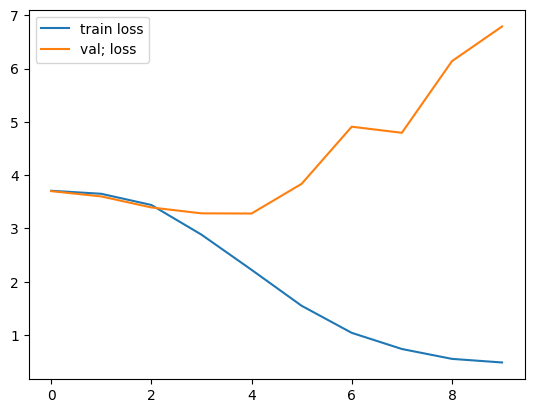

In [ ]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val; loss')
plt.legend()
plt.show()

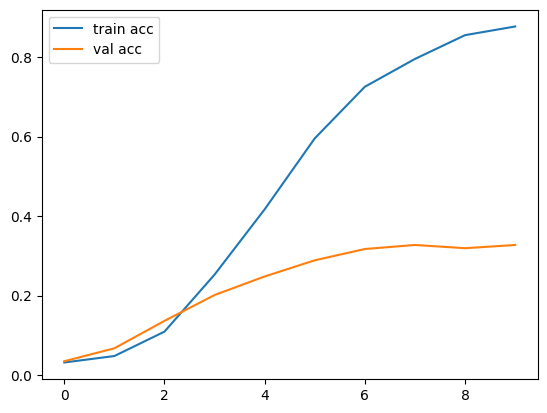

In [ ]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [ ]:
model.save('AC.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model = tf.keras.models.load_model('./AC.h5',compile=False)

In [ ]:
import cv2
def predictor(img, model):
    image = cv2.imread(img)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))
    image = np.array(image, dtype = 'float32')/255.0
    plt.imshow(image)
    image = image.reshape(1, 224,224,3)

    label_names = train_data.class_indices
    dict_class = dict(zip(list(range(len(label_names))), label_names))
    clas = model.predict(image).argmax()
    name = dict_class[clas]
    print('The given image is of \nClass: {0} \nAnimal: {1}'.format(clas, name))

1/1 [==============================] - 0s 48ms/step
The given image is of 
Class: 0 
Animal: antelope


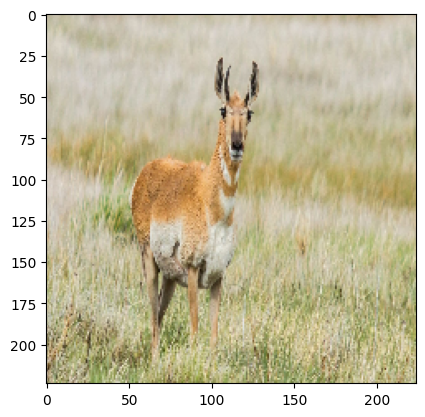

In [ ]:
predictor('/content/drive/MyDrive/animalset12/antelope/02f4b3be2d.jpg',model)

1/1 [==============================] - 0s 52ms/step
The given image is of 
Class: 21 
Animal: kangaroo


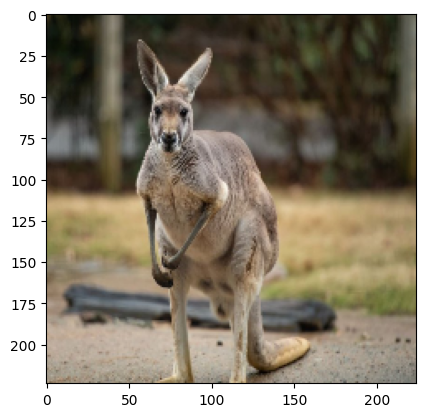

In [ ]:
predictor('/content/drive/MyDrive/kangaroo.jpg',model)

1/1 [==============================] - 0s 50ms/step
The given image is of 
Class: 2 
Animal: bat


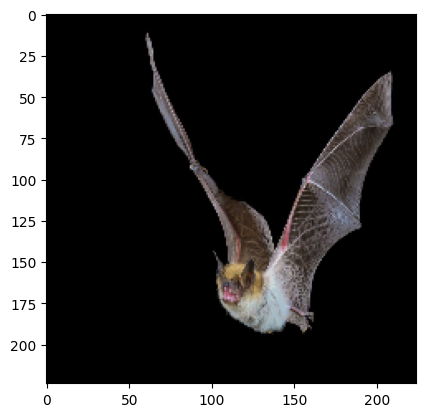

In [ ]:
predictor('/content/drive/MyDrive/animalset12/bat/0315a4b6b7.jpg',model)

In [ ]:
!pip install -q streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 55.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.6 MB/s eta 0:00:00


In [ ]:
!wget -q -O - ipv4.icanhazip.com

34.172.73.10


In [ ]:
! streamlit run app.py & npx localtunnel --port 8501

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py
npx: installed 22 in 7.777s
your url is: https://rotten-books-write.loca.lt
